In [82]:
using Plots
include("../../src/UniversalDiffEq.jl" )
include("OpenAccessFishery.jl")

Main.OpenAccessFishery

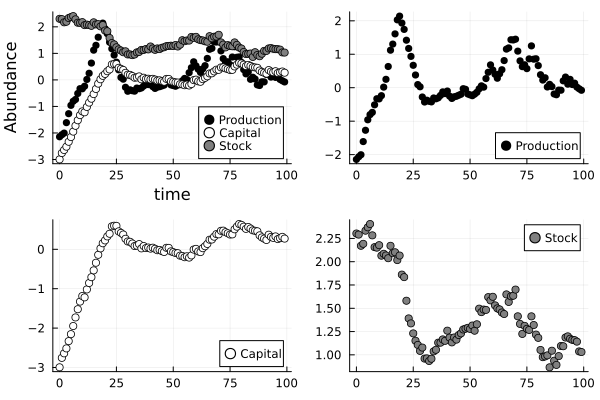

In [42]:

stable_eq = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.11,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.25,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.1,sigma_K = 0.05)

data_stable = OpenAccessFishery.simulate_data(stable_eq,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data_stable)
plot(p1,p2,p3,p4)

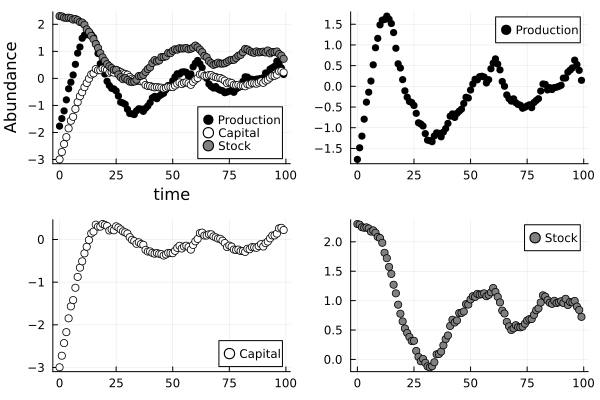

In [43]:
damped_osc = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.25,
            tech_imporvement = 0.0,handeling_time = 0.0,k = 1.0,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.05)


data_damped = OpenAccessFishery.simulate_data(damped_osc,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data_damped)
plot(p1,p2,p3,p4)

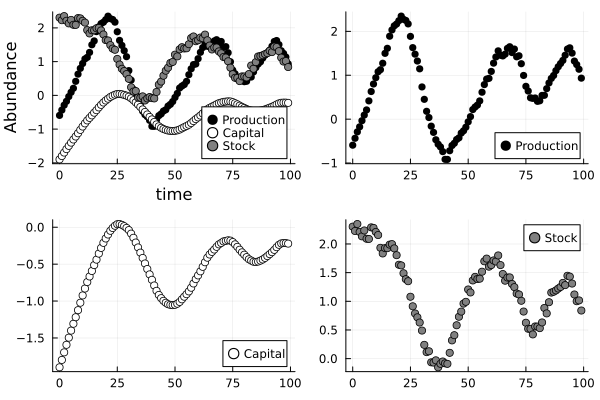

In [44]:
limit_cyc = (u0 = [10.0,0.15,0.0],growth_rate = 0.5,carrying_capacity = 10.0,search_efficancy_0 = 0.9,
            tech_imporvement = 0.0,handeling_time = 0.3,k= 1.0,depreciation = 0.0,entry = 0.1,exit = 0.1,
            threshold_CPUE = 1.4, sigma_X = 0.1,sigma_K = 0.0)

data_limit = OpenAccessFishery.simulate_data(limit_cyc,nsteps = 100,tspan = [0.0,100],sigma = [0.0,0.0,0.0])
p1,p2,p3,p4 = OpenAccessFishery.plot_simulation(data_limit)
Plots.plot(data_limit.t,exp.(data_limit.Stock))
plot(p1,p2,p3,p4)

In [45]:

stable_eq = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.11,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.25,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.075,sigma_K = 0.075)

data = OpenAccessFishery.simulate_data(stable_eq,nsteps = 80,tspan = [0.0,80],
                                sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])
data[1:6,:]

Row,t,Capital,Stock
,Float64,Float64,Float64
1,0.0,-2.99573,2.30259
2,1.0,-2.7512,2.35369
3,2.0,-2.46149,2.3259
4,3.0,-2.3327,2.34334
5,4.0,-1.92115,2.22048
6,5.0,-1.82752,2.25185


In [46]:
model = UniversalDiffEq.SSNODE(data, obs_weight = 0.5,  proc_weight = 2.0)
nothing

In [61]:
# initial neurla Network
using Random, Lux
dims_in = 2; dims_out = 1; hidden = 10
Random.seed!(1);rng = Random.default_rng() 
NN = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states = Lux.setup(rng,NN) 

initial_parameters = (NN=NN_predict,r = 0.5,K=10.0,delta=0.05,a=0.2,pi=0.01)


function derivs(du,u,p,t)
    X = u[1];K = u[2]
    CPUE = NN(u,p.NN,NN_states)[1][1]
    dX = p.r*X*(1-X/p.K) - CPUE * K
    dK = -1*p.delta*K
    dK += p.a*(CPUE-p.pi)*K
    du[1] = dX; du[2] = dK
end 

nothing

In [83]:
model = UniversalDiffEq.CustomDerivs(data,derivs,initial_parameters,l = 1.0, reg_weight = 10^-2)
nothing

In [ ]:
UniversalDiffEq.gradient_decent!(model,verbos = true, maxiter = 250)

2.624 2.437 2.262 2.099 1.947 1.804 1.67 1.545 1.429 1.322 1.224 1.132 1.047 0.967 0.893 0.823 0.759 0.699 0.644 0.502 0.462 0.424 0.389 0.357 0.328 0.301 0.275 0.252 0.23 0.211 0.192 0.176 0.16 0.147 0.134 0.122 0.111 0.101 0.092 0.084 0.077 0.07 0.064 0.058 0.053 0.048 0.044 0.04 0.037 0.034 0.031 0.028 0.026 0.024 0.022 0.02 0.019 0.018 0.016 0.015 0.014 0.013 0.013 0.012 0.011 0.011 0.01 0.01 0.01 0.009 0.009 0.009 0.008 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0

In [ ]:
UniversalDiffEq.BFGS!(model,verbos = true)

0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 0.006 

In [ ]:
UniversalDiffEq.plot_state_estiamtes(model)

In [ ]:
UniversalDiffEq.plot_predictions(model)

In [ ]:
plt,(p1,p2)=UniversalDiffEq.plot_forecast(model, 20)
plt

In [ ]:
MSE, training_data, testing_data, standard_error, predicted_data = UniversalDiffEq.leave_future_out_cv(model;forecast_length = 20,  
                                            forecast_number = 5, spacing = 10, step_size = 0.05, maxiter = 500)
plot_sim_test(data,MSE, training_data, testing_data, standard_error, predicted_data)

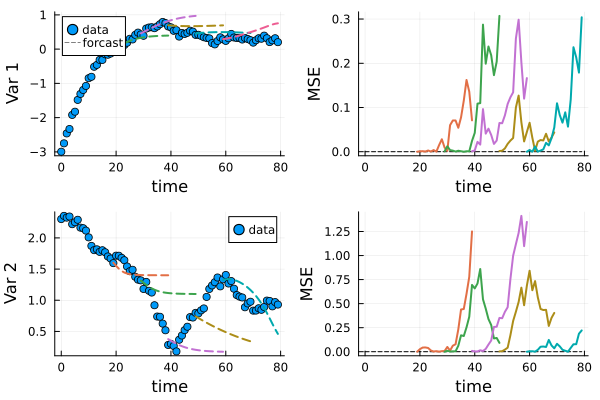

In [71]:
include("simulation_tests.jl")
plot_sim_test(data,MSE, training_data, testing_data, standard_error, predicted_data)

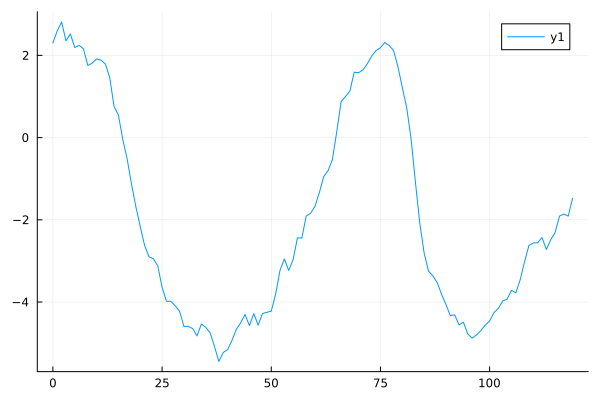

# Models derivs

## Model 1
Neural network for CPUE with no fixed parameters 

In [15]:
using Random, Lux
dims_in = 2; dims_out = 1; hidden = 10
Random.seed!(1);rng = Random.default_rng() 
NN_model1 = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states_model1 = Lux.setup(rng,NN_model1) 
initial_parameters_model1 = (NN=NN_predict,r = 0.5,K=10.0,delta=0.05,a=0.2,pi=0.01)

function derivs1(du,u,p,t,known)
    X = exp(u[2]);K = exp(u[1])
    CPUE = NN_model1(u,p.NN,NN_states_model1)[1][1]
    dX = p.r*X*(1-X/p.K) - CPUE * K
    dK = -1*p.delta*K
    dK += p.a*(CPUE-p.pi)*K
    du[2] = dX/X; du[1] = dK/K
    du
end 

derivs1 (generic function with 1 method)

## Model 2
Neural network for CPUE with known growth rate and carrying capacity

In [574]:
dims_in = 2; dims_out = 1; hidden = 10
NN_model2 = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states = Lux.setup(rng,NN_model2) 
initial_parameters_model2 = (NN=NN_predict,delta=0.05,a=0.2,pi=0.01)

function derivs2(du,u,p,t,known)
    X = exp(u[2]);K = exp(u[q])
    CPUE = NN_model2(u,p.NN,NN_states)[1][1]
    dX = known.r*X*(1-X/known.K) - CPUE * K
    dK = -1*p.delta*K
    dK += p.a*(CPUE-p.pi)*K
    du[2] = dX; du[1] = dK
end 


derivs2 (generic function with 1 method)

## Model 3
Neural network for CPUE with known investment parameters

In [575]:
dims_in = 2; dims_out = 1; hidden = 10
NN_model3 = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states = Lux.setup(rng,NN_model3) 
initial_parameters_model3 = (NN=NN_predict,r = 0.5,K=10.0)

function derivs3(du,u,p,t,known)
    X = exp(u[2]);K = exp(u[1])
    CPUE = NN_model3(u,p.NN,NN_states)[1][1]
    dX = p.r*X*(1-X/p.K) - CPUE * K
    dK = -1*known.delta*K
    dK += known.a*(CPUE-known.pi)*K
    du[2] = dX; du[1] = dK
end 

derivs3 (generic function with 1 method)

## Model 4
CPUE function known neural network for everything else

In [222]:
dims_in = 2; dims_out = 2; hidden = 10
NN_model4 = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states4 = Lux.setup(rng,NN_model4) 
initial_parameters_model4 = (NN=NN_predict,)

function derivs4(du,u,p,t,known,scales)
    X = u[2]/scales[2];K = u[1]/scales[1]
    du .= NN_model4(u,p.NN,NN_states4)[1]
    CPUE = known.search_efficancy*X^known.k/(1 + known.handeling_time*known.search_efficancy*X^known.k)
    du[2] +=  -1* CPUE * K 
    du[1] = du[1] * scales[1]
    du[2] = du[2] * scales[2]
end 

derivs4 (generic function with 1 method)

## Model 5
Popualtion growth neural net,CPUE known, investment estimated

In [211]:
dims_in = 2; dims_out = 2; hidden = 10
NN_model4 = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,dims_out))
NN_predict, NN_states5 = Lux.setup(rng,NN_model4) 
initial_parameters_model5 = (NN=NN_predict,delta=0.05,a=0.2,pi=0.01)

function derivs5(du,u,p,t,known, scale)
    X = u[2]/scale[2];K = u[1]/scale[2]
    du_ = NN_model4(u,p.NN,NN_states5)[1]
    CPUE = known.search_efficancy*X/(1 + known.handeling_time*known.search_efficancy*X)
    dX = du_[1] - CPUE * K
    dK = -1*p.delta*K
    dK += p.a*(CPUE-p.pi)*K
    du[2] = dX*scale[2]; du[1] = dK*scale[1]
end 

derivs5 (generic function with 2 methods)

## Model 6

known CPUE and investment, population growth neural network 

In [196]:
using Lux, Random
dims_in = 2; dims_out = 1; hidden = 5
NN_model6 = Lux.Chain(Lux.Dense(dims_in,hidden,tanh), Lux.Dense(hidden,hidden,tanh),Lux.Dense(hidden,dims_out))
NN_predict, NN_states6 = Lux.setup(rng,NN_model6) 
initial_parameters_model6 = (NN=NN_predict,)

function derivs6(du,u,p,t,known, scales)
    X = u[2]/scales[2];K = u[1]/scales[1]
    CPUE = known.search_efficancy*X^known.k/(1 + known.handeling_time*known.search_efficancy*X^known.k)
    dX = NN_model6(u,p.NN,NN_states6)[1][1]- CPUE*K
    dK = -1*known.delta*K
    dK += known.a*(CPUE-known.pi)*K
    du[1] = Kscale
    du[1]=dK*scales[1]; du[2] = dX*scales[2]
end 

derivs6 (generic function with 2 methods)

# Test model fits

In [212]:
limit_cyc

(u0 = [10.0, 0.15, 0.0], growth_rate = 0.5, carrying_capacity = 10.0, search_efficancy_0 = 0.9, tech_imporvement = 0.0, handeling_time = 0.3, k = 1.0, depreciation = 0.0, entry = 0.1, exit = 0.1, threshold_CPUE = 1.4, sigma_X = 0.1, sigma_K = 0.0)

In [227]:
pars = damped_osc # damped_osc
known = (handeling_time = pars.handeling_time, search_efficancy = pars.search_efficancy_0, delta = pars.depreciation, a = pars.entry, pi = pars.threshold_CPUE, r=pars.growth_rate,K=pars.carrying_capacity, k = pars.k)
unknown = initial_parameters_model5
scales = [2.0,0.4]
derivs(du,u,p,t) = derivs5(du,u,p,t,known,scales)
cols = vcat([1],3:4); Ttest = 20
data_full= data_damped[:,cols];
data_full.Capital .= scales[1]*exp.(data_full.Capital)
data_full.Stock .= scales[2]*exp.(data_full.Stock)
data_train = data_full[1:(end-Ttest),:]; data_test = data_full[(end-Ttest):end,:]
model = UniversalDiffEq.CustomDerivs(data_train,derivs,unknown;proc_weight=1.0,obs_weight=1.0,reg_weight = 10^-10)
nothing

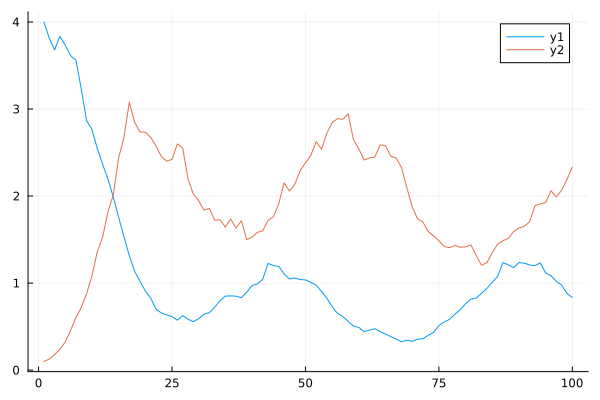

In [228]:
using Plots
Plots.plot(data_full.Stock)
Plots.plot!(data_full.Capital)

In [229]:
UniversalDiffEq.gradient_decent!(model,verbos = true, maxiter = 250, step_size = 0.1)

6.598 5.998 5.465 4.924 4.471 4.04 3.62 3.279 2.907 2.637 2.347 2.082 1.895 1.644 1.496 1.312 1.157 1.031 0.896 0.798 0.681 0.62 0.518 0.471 0.405 0.363 0.317 0.29 0.247 0.228 0.198 0.178 0.156 0.148 0.13 0.128 0.115 0.109 0.097 0.093 0.086 0.086 0.08 0.077 0.071 0.067 0.063 0.059 0.055 0.048 0.045 0.039 0.036 0.032 0.031 0.03 0.03 0.027 0.022 0.02 0.021 0.022 0.019 0.016 0.017 0.017 0.014 0.015 0.014 0.012 0.013 0.013 0.012 0.012 0.012 0.011 0.012 0.011 0.01 0.011 0.011 0.01 0.01 0.01 0.01 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.009 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.008 0.009 0.009 0.009 0.008 0.008 0.008 0.007 0.007 0.008 0.008 0.008 0.008 0.009 0.009 0.009 0.008 0.007 0.007 0.007 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.008 0.008 0.008 0.008 0.008 0.008 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.007 0.008 0.008 0.009 0.01 0.01 0.009 0.008 0.007 0.007 0.007 0.008 0.009 0.009 0.008 0.007 0.

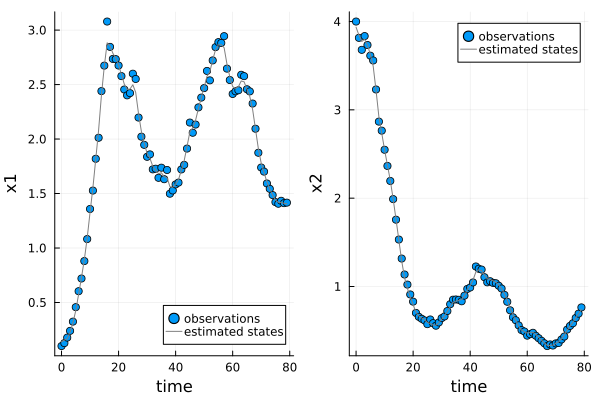

In [230]:
UniversalDiffEq.plot_state_estiamtes(model)

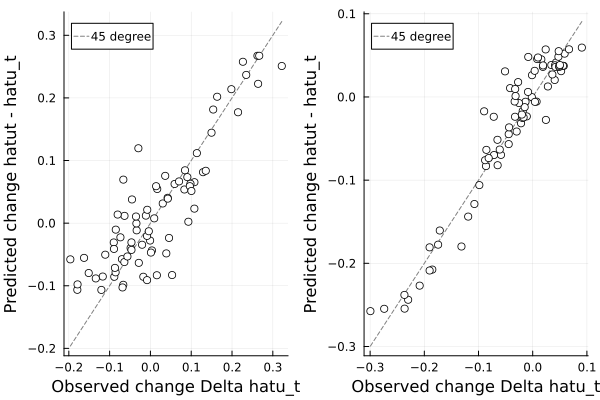

In [231]:
UniversalDiffEq.plot_predictions(model)

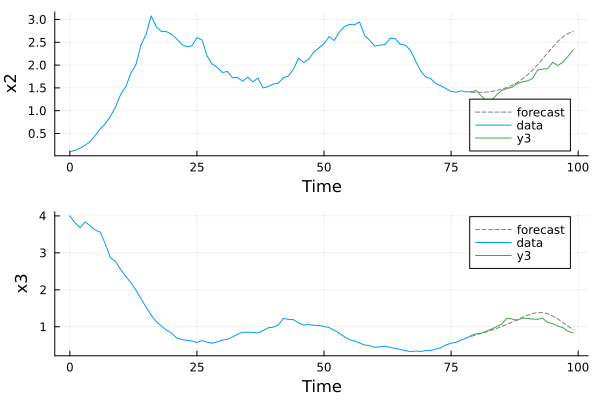

In [232]:
plt, plts = UniversalDiffEq.plot_forecast(model, Ttest)
p1=Plots.plot!(plts[1], data_test.t, data_test.Capital)
p2=Plots.plot!(plts[2], data_test.t, data_test.Stock)
plot(p1,p2,layout=(2,1))

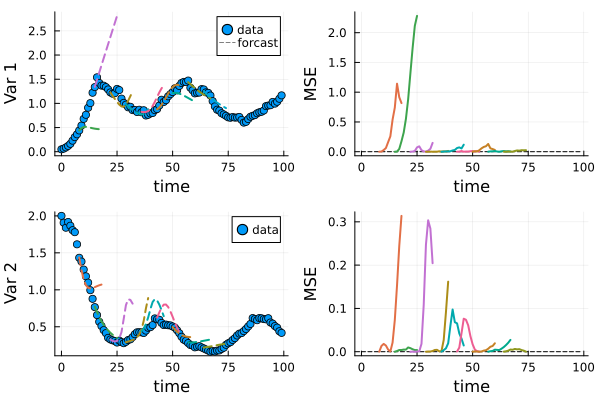

In [226]:
include("simulation_tests.jl")
model = UniversalDiffEq.CustomDerivs(data_full[1:(end-25),:],derivs,unknown)
MSE, training_data, testing_data, standard_error, predicted_data = UniversalDiffEq.leave_future_out_cv(model;forecast_length = 10,  
                                            forecast_number = 9, spacing = 7, step_size = 0.05, maxiter = 500)
plot_sim_test(data_full ,MSE, training_data, testing_data, standard_error, predicted_data)

In [ ]:
plot_sim_test(data_full ,MSE, training_data, testing_data, standard_error, predicted_data)

# Simultion tests 

In [ ]:
stable_eq = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.11,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.25,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.05)

damped_osc = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.25,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.0,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.15,sigma_K = 0.05)

limit_cyc = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.65,
            tech_imporvement = 0.0,handeling_time = 0.3,k= 1.1,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.2,sigma_K = 0.05)


params = (stable_eq,damped_osc,limit_cyc)

function data_generator(pars)
    data = OpenAccessFishery.simulate_data(pars,nsteps = 120,tspan = [0.0,120],sigma=[0.0,0.0,0.0],variables=["Capital","Stock"])
    return data
end

data, ind = data_generator_()
Plots.plot(data.t, data.Stock)

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 

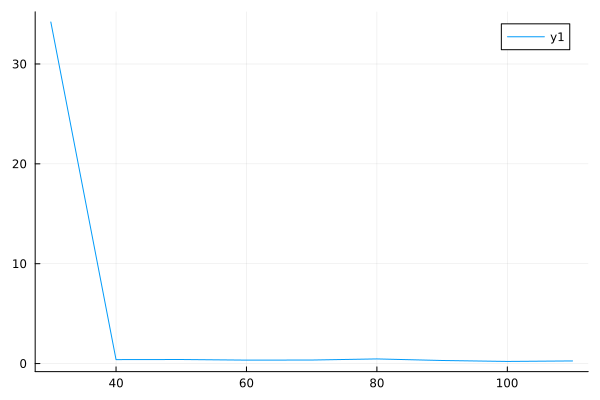

In [29]:
include("simulation_tests.jl")

forecast_length = 10
forecast_number = 8
spacing = 10

SEs, data_quantity = simulation_tests( () -> data_generator(limit_cyc),model,forecast_length,forecast_number,spacing;Nsims = 50,maxiter=250,stepsize=0.05)
Plots.plot(data_quantity,SEs)

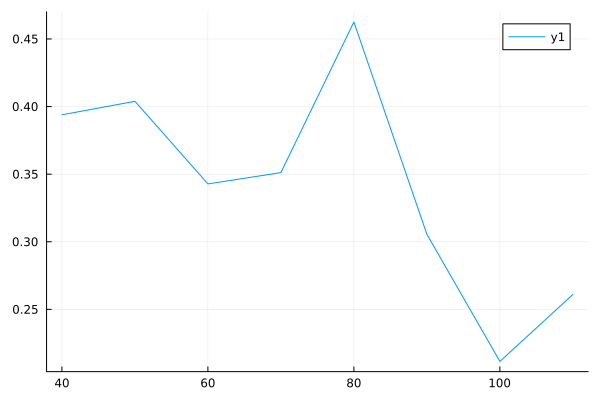

In [30]:
Plots.plot(data_quantity[2:end],SEs[2:end])

In [10]:
# parameters
k = OpenAccessFishery.damped_osc.k
handeling_time = OpenAccessFishery.damped_osc.handeling_time
search_efficancy = OpenAccessFishery.damped_osc.search_efficancy_0
threshold_CPUE = OpenAccessFishery.damped_osc.threshold_CPUE
entry = OpenAccessFishery.damped_osc.entry

function interaction_term(u,p)
    X = exp(u[1]); K = exp(u[2])
    CPUE = p.search_efficancy*X/(1 + p.handeling_time*p.search_efficancy*X)
    dX = -CPUE * K
    dK = entry*(CPUE-threshold_CPUE)*K
    return [1/X,1/K].*[dX,dK]
end 

pinit = ()


pars = (u0 = [10.0,0.05,0.0],growth_rate = 0.3,carrying_capacity = 10.0,search_efficancy_0 = 0.25,
            tech_imporvement = 0.0,handeling_time = 0.0,k= 1.0,depreciation = 0.0,entry = 0.15,exit = 0.15,
            threshold_CPUE = 0.5, sigma_X = 0.05,sigma_K = 0.025)


data = OpenAccessFishery.simulate_data(pars,nsteps = 50,tspan = [0.0,100],
                                sigma = [0.0,0.0,0.0],variables = ["Capital","Stock"])

model = ContinuousModelErrors(data,interaction_term, pinit, proc_weight=2.0,obs_weight=0.5, reg_weight = 10^-8)
p1,p2,p3,p4=OpenAccessFishery.plot_simulation(data)
plot(p1,p3,p4)

LoadError: UndefVarError: ContinuousModelErrors not defined

In [ ]:
gradient_decent!(model,verbos = true, maxiter = 500, step_size = 0.05)

In [ ]:
plot_state_estiamtes(model)

In [ ]:
plot_predictions(model)

In [ ]:
plot_forecast(model,20)

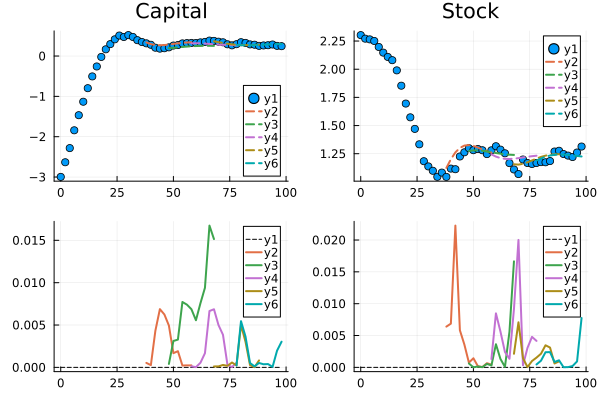

In [204]:
model1 = SSNODE(data,proc_weight=2.0,obs_weight=0.5, reg_weight = 0.0)
MSE, training_data, testing_data, standard_error, predicted_data = leave_future_out_cv(model1;forecast_length = 10,  
                                            forecast_number = 5, spacing = 5, step_size = 0.05, maxiter = 500)

UniversalDiffEq.plot_leave_future_out_cv(model1.data_frame,testing_data, standard_error , predicted_data)

plot(p1,p2,layout = (2,1))